In [50]:
import pandas as pd
import seaborn as sns

In [51]:
df = pd.read_csv("../../Documents/NSEBANK.csv")

In [52]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-26,23674.900391,24290.650391,23657.050781,24244.349609,24244.068359,0.0
1,2018-03-27,24396.400391,24496.949219,24266.400391,24434.150391,24433.867188,0.0
2,2018-03-28,24299.500000,24361.000000,24203.400391,24263.349609,24263.068359,0.0
3,2018-04-02,24235.650391,24373.400391,24062.949219,24328.500000,24328.216797,0.0
4,2018-04-03,24285.949219,24538.000000,24254.349609,24510.599609,24510.314453,0.0


In [53]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1232,2023-03-20,39512.101563,39512.101563,38941.898438,39361.949219,39361.949219,173800.0
1233,2023-03-21,39599.648438,39970.898438,39366.300781,39894.699219,39894.699219,187900.0
1234,2023-03-22,40036.000000,40085.601563,39837.800781,39999.050781,39999.050781,0.0
1235,2023-03-23,39836.148438,40201.601563,39552.500000,39616.898438,39616.898438,153200.0
1236,2023-03-24,39555.250000,39767.898438,39294.898438,39395.351563,39395.351563,166100.0


In [54]:
df.Date = pd.to_datetime(df.Date)

In [55]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [58]:
df["day"] = df['Date'].dt.day
df["week"] = df['Date'].dt.day_name()
df['month']=df["Date"].dt.month
df['year']=df["Date"].dt.year

In [59]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,week,month,year
0,2018-03-26,23674.900391,24290.650391,23657.050781,24244.349609,24244.068359,0.0,26,Monday,3,2018
1,2018-03-27,24396.400391,24496.949219,24266.400391,24434.150391,24433.867188,0.0,27,Tuesday,3,2018
2,2018-03-28,24299.500000,24361.000000,24203.400391,24263.349609,24263.068359,0.0,28,Wednesday,3,2018
3,2018-04-02,24235.650391,24373.400391,24062.949219,24328.500000,24328.216797,0.0,2,Monday,4,2018
4,2018-04-03,24285.949219,24538.000000,24254.349609,24510.599609,24510.314453,0.0,3,Tuesday,4,2018


In [60]:
df = df.dropna()

In [77]:
df = df.drop(["Date", "Adj Close", "Volume"], axis=1)

In [114]:
df["gap_up"] = [0]+(df["Open"][1:].to_numpy() - df["Close"][:-1].to_numpy()).tolist()

In [151]:
df["gap_up_sign"] = df["gap_up"].map(lambda x: 0 if x<=0 else 1)

In [158]:
df["pl"] = df["Open"] - df["Close"]
df["pl_sign"] = df["pl"].map(lambda x: 0 if x<=0 else 1)

<Axes: xlabel='year'>

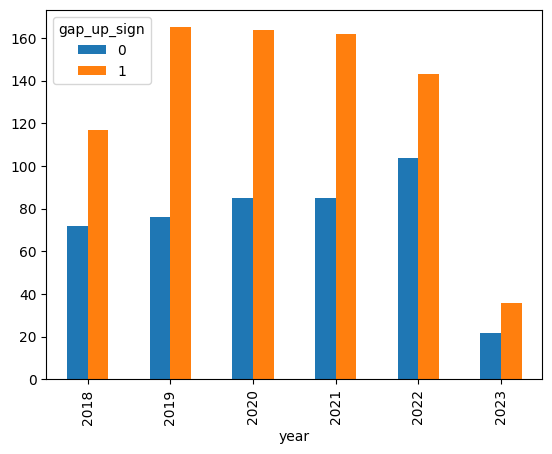

In [152]:
df.groupby(by=["year", "gap_up_sign"]).count().unstack(fill_value=0)["gap_up"].plot.bar()

In [150]:
# Every year gap up are more then gap down 

<Axes: xlabel='week'>

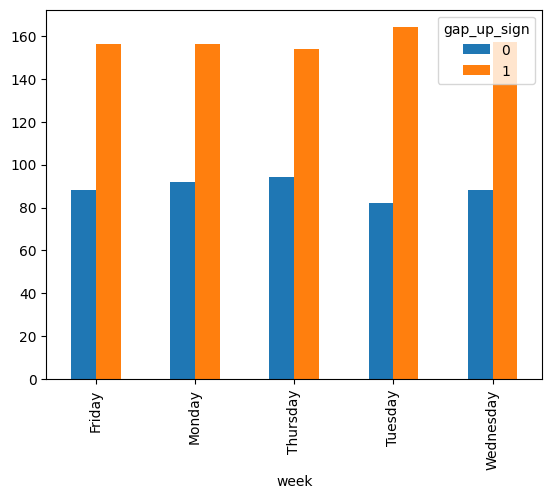

In [155]:
df.groupby(by=["week", "gap_up_sign"]).count().unstack(fill_value=0)["gap_up"].plot.bar()

<Axes: xlabel='year'>

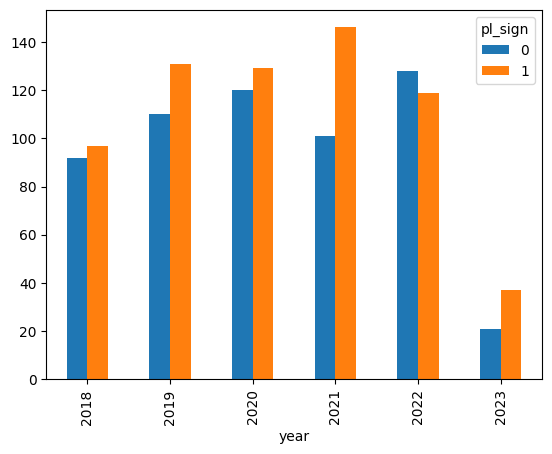

In [159]:
df.groupby(by=["year", "pl_sign"]).count().unstack(fill_value=0)["gap_up"].plot.bar()

<Axes: xlabel='week'>

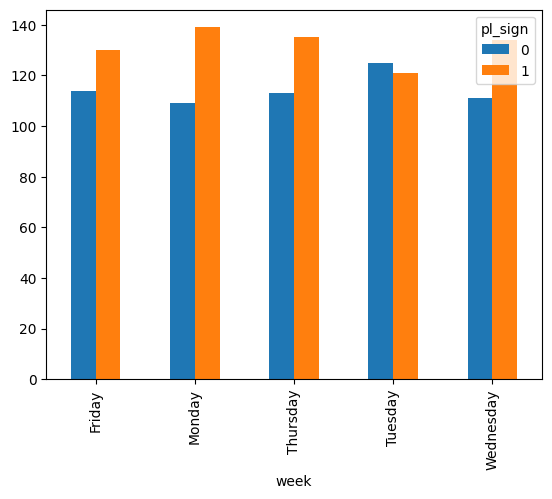

In [160]:
df.groupby(by=["week", "pl_sign"]).count().unstack(fill_value=0)["gap_up"].plot.bar()

In [161]:
df.describe()

,Open,High,Low,Close,day,month,year,gap_up,gap_up_sign,pl,pl_sign
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,31419.873028,31669.063109,31119.557543,31398.030230,15.792851,6.530463,2020.240455,34.613270,0.639318,21.842798,0.535337
std,6202.264052,6203.093581,6199.438902,6203.969447,8.766816,3.446526,1.476875,266.276181,0.480394,385.597487,0.498952
min,16759.949219,17681.699219,16116.250000,16917.650391,1.000000,1.000000,2018.000000,-2006.298828,0.000000,-2445.699219,0.000000
25%,26877.525390,27008.224610,26674.149414,26819.750000,8.000000,4.000000,2019.000000,-60.725586,0.000000,-193.899414,0.000000
50%,31065.099609,31359.349609,30860.699219,31111.599609,16.000000,7.000000,2020.000000,51.599609,1.000000,22.250000,1.000000
75%,36106.449219,36484.625000,35766.275391,36101.699219,23.000000,9.000000,2021.000000,155.375977,1.000000,226.624024,1.000000
max,44078.601563,44151.800781,43987.949219,44049.101563,31.000000,12.000000,2023.000000,1338.500000,1.000000,1831.650390,1.000000


In [181]:
df[df.gap_up == max(df.gap_up)]

,Open,High,Low,Close,day,week,month,year,gap_up,gap_up_sign,pl,pl_sign
977,35153.949219,35374.148438,34218.050781,34475.601563,10,Thursday,3,2022,1338.5,1,678.347656,1


In [182]:
df[df.gap_up == min(df.gap_up)]

,Open,High,Low,Close,day,week,month,year,gap_up,gap_up_sign,pl,pl_sign
488,18311.300781,18895.650391,16791.050781,16917.650391,23,Monday,3,2020,-2006.298828,0,1393.65039,1


<Axes: ylabel='gap_up'>

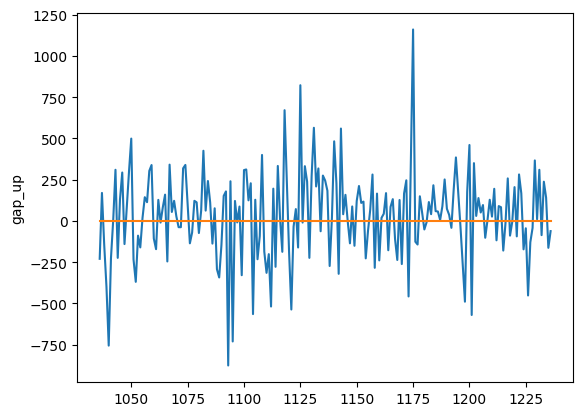

In [187]:
time = 200
sns.lineplot(df.tail(time).gap_up)
sns.lineplot(x = df.tail(time).index, y = 0)

In [175]:
df[:-10]

,Open,High,Low,Close,day,week,month,year,gap_up,gap_up_sign,pl,pl_sign
0,23674.900391,24290.650391,23657.050781,24244.349609,26,Monday,3,2018,0.000000,0,-569.449218,0
1,24396.400391,24496.949219,24266.400391,24434.150391,27,Tuesday,3,2018,152.050782,1,-37.750000,0
2,24299.500000,24361.000000,24203.400391,24263.349609,28,Wednesday,3,2018,-134.650391,0,36.150391,1
3,24235.650391,24373.400391,24062.949219,24328.500000,2,Monday,4,2018,-27.699218,0,-92.849609,0
4,24285.949219,24538.000000,24254.349609,24510.599609,3,Tuesday,4,2018,-42.550781,0,-224.650390,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1222,40671.398438,41390.148438,40605.351563,41251.351563,3,Friday,3,2023,281.597657,1,-579.953125,0
1223,41418.398438,41671.199219,41259.148438,41350.398438,6,Monday,3,2023,167.046875,1,68.000000,1
1224,41178.351563,41625.351563,41100.351563,41577.101563,8,Wednesday,3,2023,-172.046875,0,-398.750000,0
1225,41532.648438,41659.000000,41208.101563,41256.750000,9,Thursday,3,2023,-44.453125,0,275.898438,1


In [377]:
df2 = df[["week", "day", "gap_up_sign", "pl_sign"]]

In [378]:
df3 = df2[5:]

In [379]:
df3["day-5"] = df2["Close"][:-5].to_numpy()
df3["day-4"] = df2["Close"][1:-4].to_numpy()
df3["day-3"] = df2["Close"][2:-3].to_numpy()
df3["day-2"] = df2["Close"][3:-2].to_numpy()
df3["day-1"] = df2["Close"][4:-1].to_numpy()


KeyError: 'Close'

In [380]:
df3.tail(10)

,week,day,gap_up_sign,pl_sign
1227,Monday,13,0,1
1228,Tuesday,14,0,1
1229,Wednesday,15,1,1
1230,Thursday,16,1,0
1231,Friday,17,1,0
1232,Monday,20,0,1
1233,Tuesday,21,1,0
1234,Wednesday,22,1,1
1235,Thursday,23,0,1
1236,Friday,24,0,1


In [381]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [382]:
df_ohe = pd.concat([df3, pd.get_dummies(df3["week"])], axis=1)

In [383]:
df_ohe = df_ohe.drop("week", axis=1)

In [384]:
df_ohe

,day,gap_up_sign,pl_sign,Friday,Monday,Thursday,Tuesday,Wednesday
5,4,0,1,0,0,0,0,1
6,5,1,0,0,0,1,0,0
7,6,1,0,1,0,0,0,0
8,9,0,0,0,1,0,0,0
9,10,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1232,20,0,1,0,1,0,0,0
1233,21,1,0,0,0,0,1,0
1234,22,1,1,0,0,0,0,1
1235,23,0,1,0,0,1,0,0


In [397]:
x = df_ohe.drop(["gap_up_sign", "pl_sign"], axis=1)
y = df_ohe["gap_up_sign"]
x

,day,Friday,Monday,Thursday,Tuesday,Wednesday
5,4,0,0,0,0,1
6,5,0,0,1,0,0
7,6,1,0,0,0,0
8,9,0,1,0,0,0
9,10,0,0,0,1,0
...,...,...,...,...,...,...
1232,20,0,1,0,0,0
1233,21,0,0,0,1,0
1234,22,0,0,0,0,1
1235,23,0,0,1,0,0


In [398]:
rf = DecisionTreeClassifier(max_depth=5)
rf.fit(x,y)

DecisionTreeClassifier(max_depth=5)

In [399]:
rf.score(x,y)

0.6484502446982056

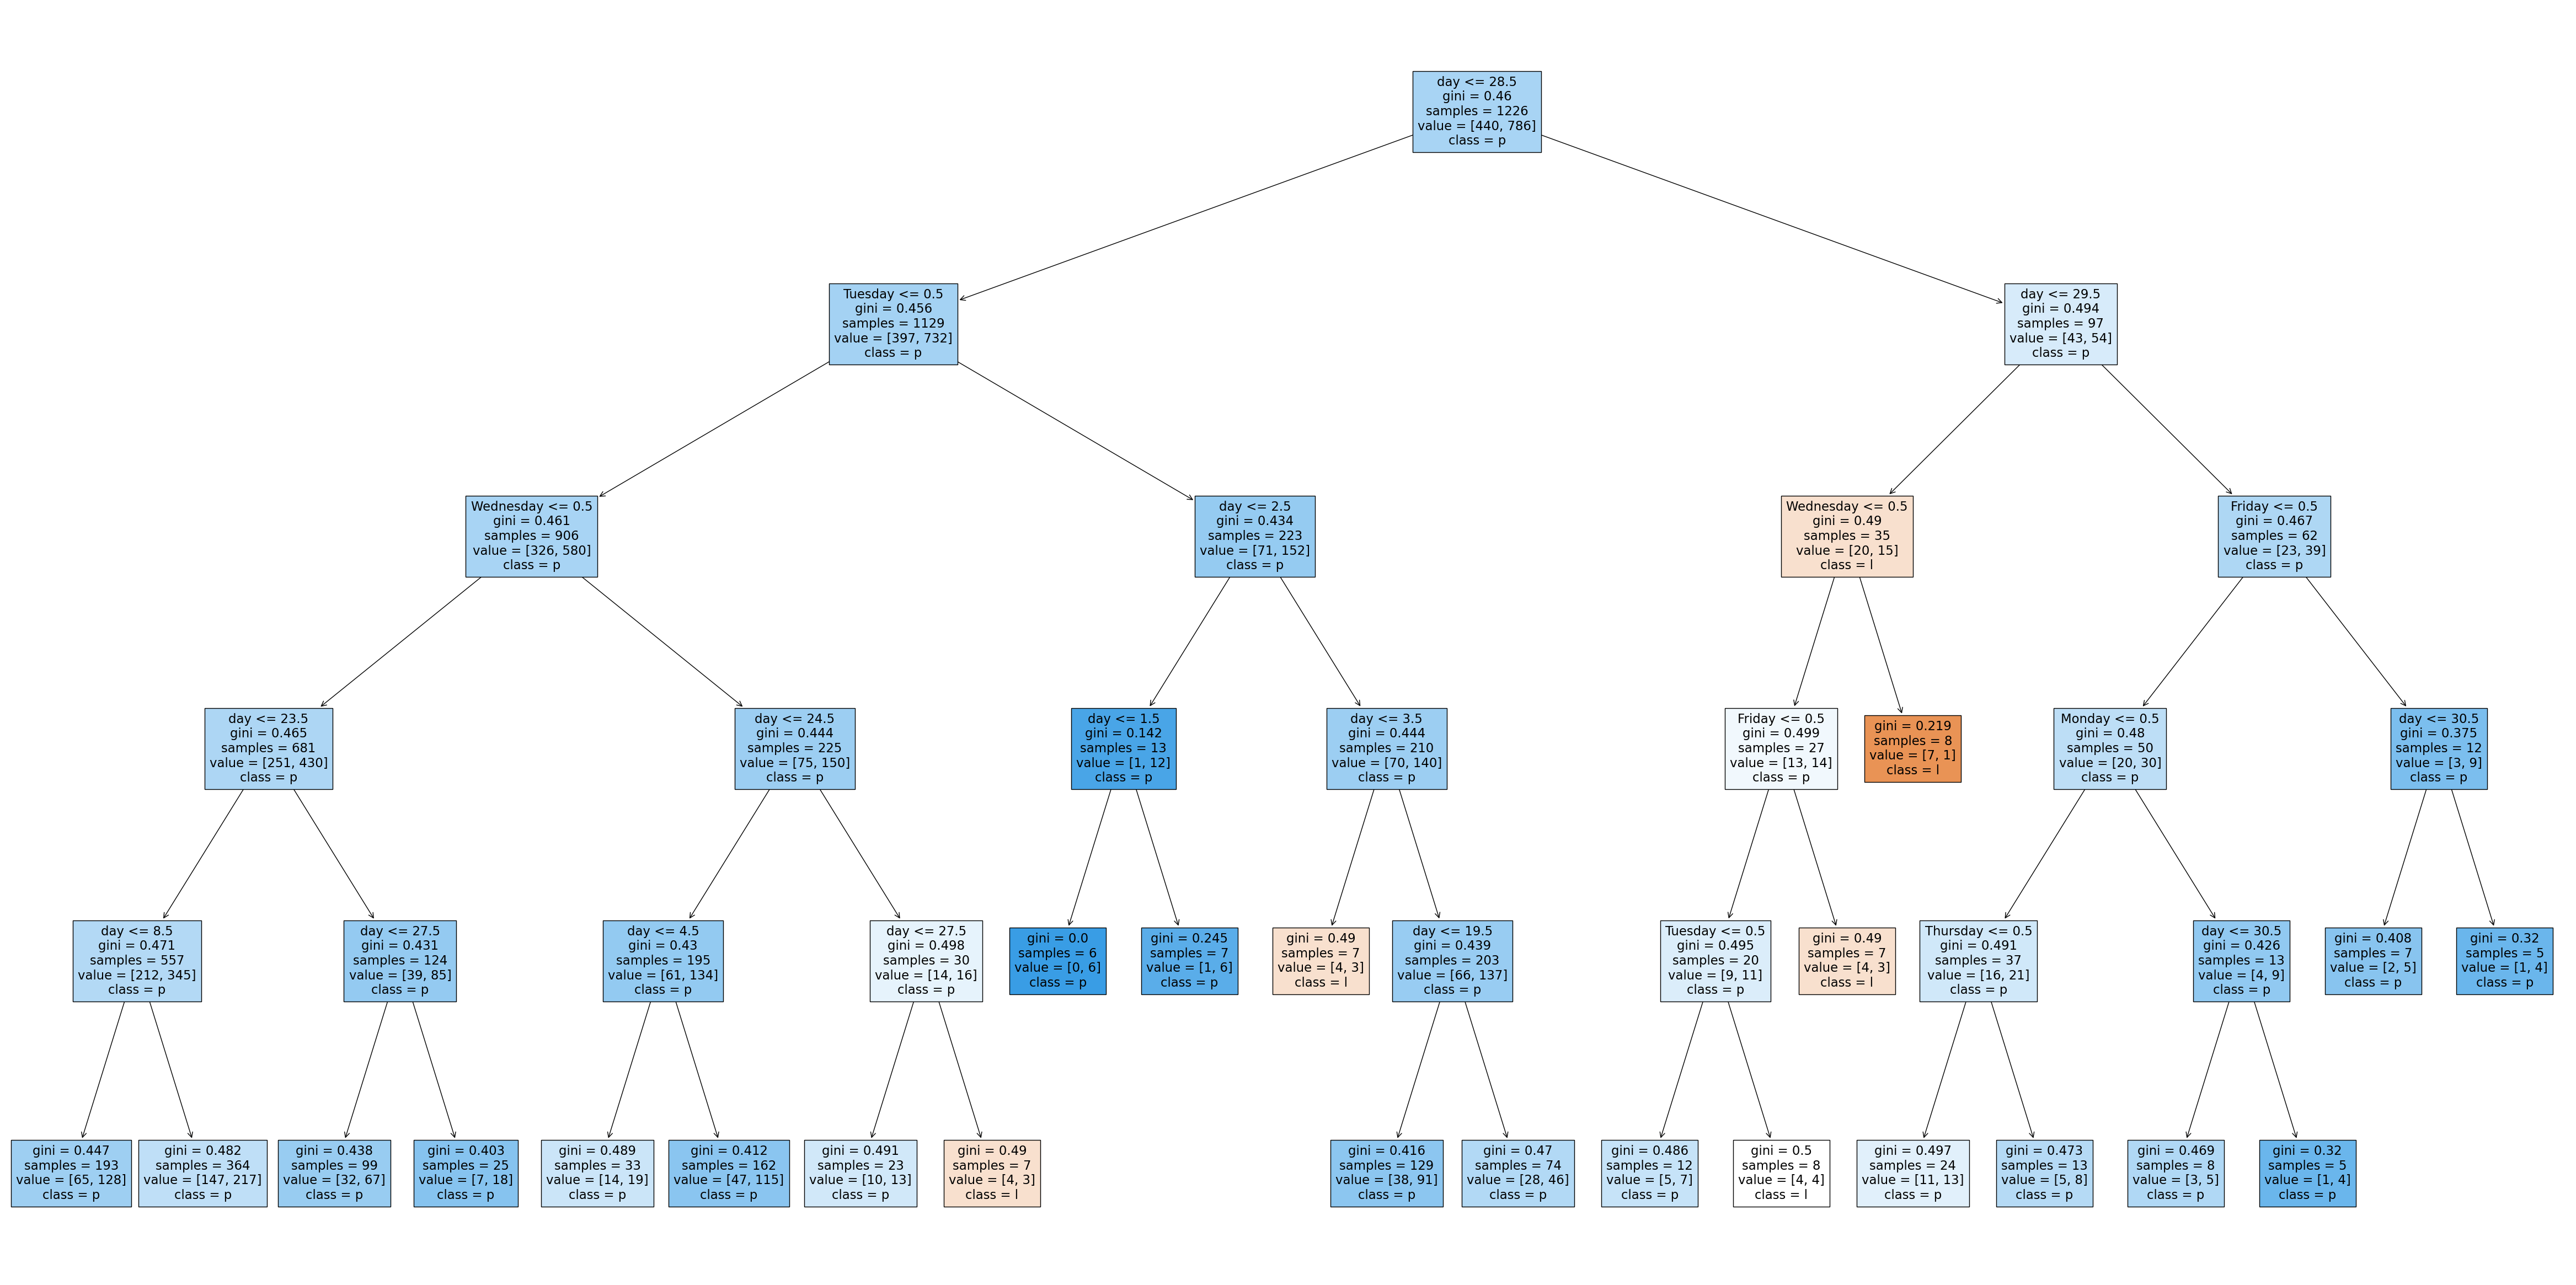

In [400]:
plt.figure(figsize=(60,30))
plot_tree(rf, feature_names = x.columns,class_names=["l", "p"],filled=True);